In [1]:
from pythtb import TBModel, Lattice
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat_vecs = [[1, 0], [1 / 2, np.sqrt(3) / 2]]
# define coordinates of orbitals
orb_vecs = [[1 / 3, 1 / 3], [2 / 3, 2 / 3]]
lat = Lattice(lat_vecs, orb_vecs, periodic_dirs=...)

# make two dimensional tight-binding Haldane model
my_model = TBModel(lat)

# set model parameters
delta = 0.0
t = -1.0
t2 = 0.15 * np.exp(1j * np.pi / 2)
t2c = t2.conjugate()

my_model.set_onsite([-delta, delta])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])
my_model.set_hop(t2, 0, 0, [1, 0])
my_model.set_hop(t2, 1, 1, [1, -1])
my_model.set_hop(t2, 1, 1, [0, 1])
my_model.set_hop(t2c, 1, 1, [1, 0])
my_model.set_hop(t2c, 0, 0, [1, -1])
my_model.set_hop(t2c, 0, 0, [0, 1])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
periodic directions         = [0, 1]
spinful                     = False
number of spin components   = 1
number of electronic states = 2
number of orbitals          = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000,  0.000]
  # 1 ===> [ 0.500,  0.866]
Volume of unit cell (Cartesian) = 0.866 [A^d]

Reciprocal lattice vectors (Cartesian):
  # 0 ===> [ 6.283, -3.628]
  # 1 ===> [ 0.000,  7.255]
Volume of reciprocal unit cell = 45.586 [A^-d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.500,  0.289]
  # 1 ===> [ 1.000,  0.577]

Orbital vectors (fractional):
  # 0 ===> [ 0.333,  0.333]
  # 1 ===> [ 0.667,  0.667]
----------------------------------------
Site energies:
  < 0 | H | 0 > = -0.000 
  < 1 | H | 1 > =  0.000 
Hoppings:
  < 0 | H | 1  + [ 0.0 ,  0.0 ] > = -1.0000+0.0000j
  < 1 | H | 0  + [ 1.0 , 

In [3]:
# cut finite models with slices in both directions
# first direction open, second direction glued
fin_model = my_model.make_finite(
    periodic_dirs=[0, 1], num_cells=[10, 10], glue_edges=[False, False]
)
fin_model_half = my_model.make_finite(
    periodic_dirs=[0, 1], num_cells=[10, 10], glue_edges=[True, False]
)

In [4]:
# solve finite models
(evals, evecs) = fin_model.solve_ham(return_eigvecs=True)
(evals_half, evecs_half) = fin_model_half.solve_ham(return_eigvecs=True)

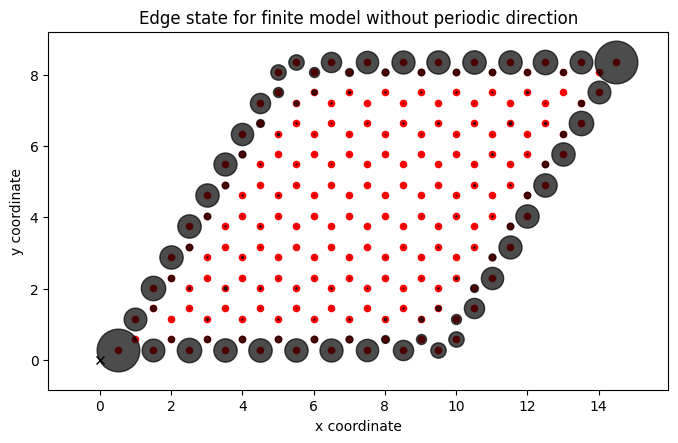

In [5]:
# pick index of state in the middle of the gap
ed = fin_model.norb // 2

# draw one of the edge states in both cases
(fig, ax) = fin_model.visualize(
    proj_plane=[0, 1], eig_dr=evecs[ed, :], draw_hoppings=False
)

ax.set_title("Edge state for finite model without periodic direction")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
plt.show()

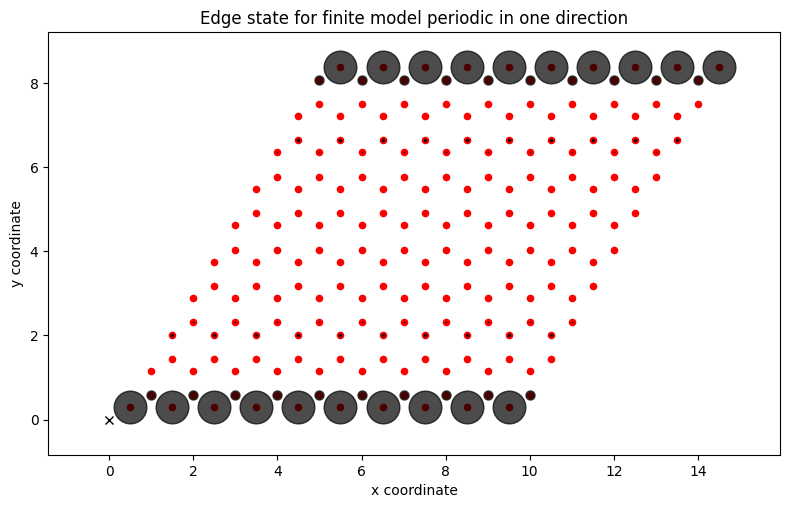

In [6]:
(fig, ax) = fin_model_half.visualize(
    proj_plane=[0, 1], eig_dr=evecs_half[ed, :], draw_hoppings=False
)
ax.set_title("Edge state for finite model periodic in one direction")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()
plt.show()